# <span style="color:red"> Laboratorio di Simulazione Numerica (LSN) </span>
## <span style="color:green"> Esercitazione Numerica #12</span>

L'obbettivo della dodicesima ed ultima esercitazione del corso era quello di costruire dei modelli di reti neurali profonde (*deep neural networks*), capaci di distinguere ed identificare cifre numeriche scritte a mano tra $0$ e $9$. Nello specifico, per svolgere i vari esercizi, abbiamo fatto riferimento sia a reti neurali dense (**DNN**), già trattate all'interno dell'esercitazione precedente, sia reti neurali convoluzionali (**CNN**) introdotte nella presente lezione teorica. Come abbiamo visto, tali NN sono in grado di sfruttare l'invarianza traslazionale per studiare proprietà locali all'interno del dato di input. La struttura tipica delle CNN è ottenuta combinando due layer di base: *convolution layer*, che esegue un processo di convoluzione per mezzo di una serie di filtri, e il *pooling layer*, capace di performare un sottocampionamento che mantenga la struttura locale dell'input.

### <span style="color:darkorange"> Esercizio 12.1</span>

Per svolgere il primo esercizio ci è stato fornito un codice di partenza, che sfruttava reti neurali dense per risolvere uno specifico problema di classificazione dei dati: riconoscere cifre numeriche scritte a mano tra $0$ e $9$. Le modifiche apportate a tale programma sono state minime. Lo scopo infatti era quello di provare a utilizzare diversi tipi di ottimizzatori, oltre alla SGD, in modo da analizzare le performance della DNN nei vari casi.

Prima di tutto quindi, ho caricato da MNIST un dataset di $7 \cdot 10^4$ immagini di cifre scritte a mano, suddividendole in $N_{train} = 6 \cdot 10^4$ e $N_{valid} = 10^4$. Ognuna di queste cifre veniva riportata all'interno di un quadrato $28\times 28$ pixel in scala di grigi, con $256$ possibili gradazioni. Di conseguenza ogni dato poteva assumere un qualunque valore intero dall'insieme $\{0,1,\dots,255\}$.

In [1]:
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

seed=0
np.random.seed(seed) # fix random seed
tf.random.set_seed(seed)

# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

Using TensorFlow backend.


X_train shape: (60000, 28, 28)
Y_train shape: (60000,)

60000 train samples
10000 test samples


In [2]:
# reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)

# cast floats to single precesion
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255

# convert class vectors to binary class matrices, e.g. for use with categorical_crossentropy
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)

All''interno dei due specchietti sottostanti, sono riportate la struttura e la fase di compilazione della DNN. Nello specifico, per questa prima simulazione, ho deciso di utilizzare come funzione di ottimizzazione *Adagrad* e ho fissato un numero di epoche pari a $20$. Chiaramente, trattandosi di un problema di classificazione dei dati in $10$ possibili categorie, è stato necessario implementare un layer di output costituito da $10$ neuroni e un classificatore, come ad esempio *softmax*, in grado di selezionare l'elemento più probabile di un dato insieme.

In [3]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

def create_DNN():
    # instantiate model
    model = Sequential()
    # add a dense all-to-all relu layer
    model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
    # add a dense all-to-all relu layer
    model.add(Dense(100, activation='relu'))
    # apply dropout with rate 0.5
    model.add(Dropout(0.5))
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax'))
    
    return model

print('Model architecture created successfully!')

Model architecture created successfully!


In [4]:
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam

def compile_model():
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=Adagrad(),
                  metrics=['accuracy'])
    return model

print('Model compiled successfully and ready to be trained.')

Model compiled successfully and ready to be trained.


In [5]:
# training parameters
batch_size = 32
epochs = 20

# create the deep neural net
model_DNN = compile_model()

# train DNN and store training info in history
history = model_DNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 11s 188us/step - loss: 0.2766 - accuracy: 0.9184 - val_loss: 0.1250 - val_accuracy: 0.9605
Epoch 2/20
60000/60000 [==============================] - 11s 186us/step - loss: 0.1419 - accuracy: 0.9602 - val_loss: 0.0946 - val_accuracy: 0.9703
Epoch 3/20
60000/60000 [==============================] - 11s 187us/step - loss: 0.1110 - accuracy: 0.9690 - val_loss: 0.0837 - val_accuracy: 0.9735
Epoch 4/20
60000/60000 [==============================] - 11s 183us/step - loss: 0.0942 - accuracy: 0.9734 - val_loss: 0.0763 - val_accuracy: 0.9757
Epoch 5/20
60000/60000 [==============================] - 11s 189us/step - loss: 0.0793 - accuracy: 0.9777 - val_loss: 0.0694 - val_accuracy: 0.9782
Epoch 6/20
60000/60000 [==============================] - 11s 188us/step - loss: 0.0679 - accuracy: 0.9806 - val_loss: 0.0667 - val_accuracy: 0.9787
Epoch 7/20
60000/60000 [==============================] 

10000/10000 [==============================] - 0s 48us/step

Test loss: 0.054945394974802914
Test accuracy: 0.9833999872207642



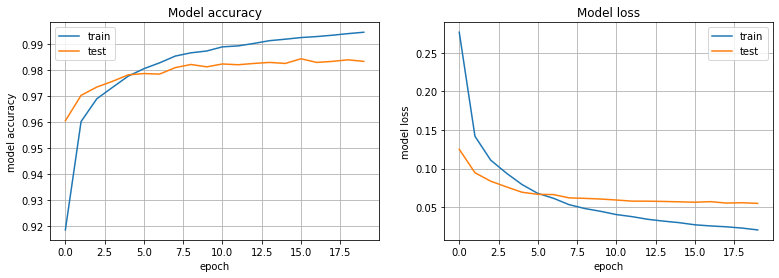

In [6]:
# evaluate model
score = model_DNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print()

# look into training history

# summarize history for accuracy
plt.figure(figsize=(20, 4))
plt.subplot(131)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.grid(True)

# summarize history for loss
plt.subplot(132)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.grid(True)
plt.show()

In accordo con quanto atteso dal corretto funzionamento di un processo di ottimizzazione di una rete neurale, vediamo come, all'aumentare del numero di epoche, l'accuratezza del modello aumenta avvicinandosi sempre più a $1$, mentre il valore della funzione costo (*Categorical Crossentropy*) tende a diminuire.

Di seguito ho riportato qualche riga di codice che permette di verificare le capacità di classificazione raggiunta dalla DNN.

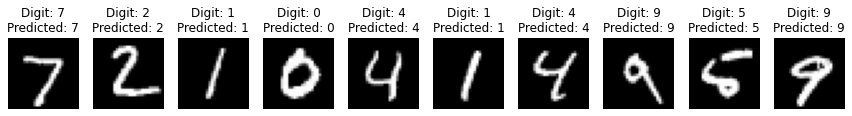

In [7]:
predictions = model_DNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted: {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

Notiamo come, almeno apparentemente, la rete neurale sembra essersi allenata a sufficienza da riuscire a distinguere e classificare le varie cifre in modo piuttosto efficiente, in questo particolare test si è ottenuto un rate di successi pari a $10/10$. E' importare sottolineare che l'alto grado di accuratezza, relativo alla classificazione dei dati in entrata, può venire fortemente influenzato dal fatto che le immagini utilizzate appartengono allo stesso campione di partenza, utilizzato durante la fase di training del modello. Ci possiamo quindi aspettare che esista un certo grado di correlazione tra le grafie con le quali sono stati scritti i diversi numeri. Questa problematica verrà affrontata all'interno del terzo esercizio.

Successivamente ho svolto una seconda simulazione, utilizzando questa volta l'ottimizzatore *Adamax*.

In [8]:
# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)

# cast floats to single precesion
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255

# convert class vectors to binary class matrices, e.g. for use with categorical_crossentropy
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)

In [9]:
def compile_model():
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=Adamax(),
                  metrics=['accuracy'])
    return model

print('Model compiled successfully and ready to be trained.')

Model compiled successfully and ready to be trained.


In [10]:
# training parameters
batch_size = 32
epochs = 20

# create the deep neural net
model_DNN = compile_model()

# train DNN and store training info in history
history = model_DNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 13s 215us/step - loss: 0.3364 - accuracy: 0.9022 - val_loss: 0.1344 - val_accuracy: 0.9595
Epoch 2/20
60000/60000 [==============================] - 13s 213us/step - loss: 0.1502 - accuracy: 0.9578 - val_loss: 0.0905 - val_accuracy: 0.9724
Epoch 3/20
60000/60000 [==============================] - 13s 218us/step - loss: 0.1093 - accuracy: 0.9690 - val_loss: 0.0756 - val_accuracy: 0.9763
Epoch 4/20
60000/60000 [==============================] - 13s 220us/step - loss: 0.0845 - accuracy: 0.9756 - val_loss: 0.0721 - val_accuracy: 0.9773
Epoch 5/20
60000/60000 [==============================] - 13s 214us/step - loss: 0.0676 - accuracy: 0.9802 - val_loss: 0.0700 - val_accuracy: 0.9771
Epoch 6/20
60000/60000 [==============================] - 13s 218us/step - loss: 0.0547 - accuracy: 0.9839 - val_loss: 0.0667 - val_accuracy: 0.9798
Epoch 7/20
60000/60000 [==============================] 

10000/10000 [==============================] - 1s 65us/step

Test loss: 0.06248302648126176
Test accuracy: 0.984499990940094



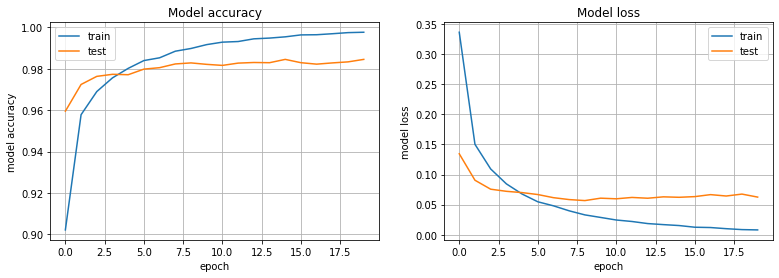

In [11]:
# evaluate model
score = model_DNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print()

# look into training history

# summarize history for accuracy
plt.figure(figsize=(20, 4))
plt.subplot(131)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.grid(True)

# summarize history for loss
plt.subplot(132)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.grid(True)
plt.show()

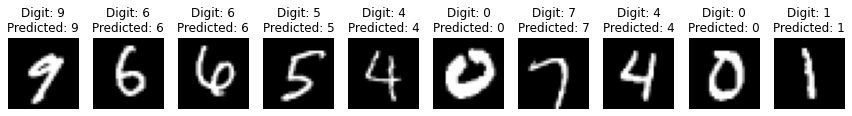

In [12]:
predictions = model_DNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i+20, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted: {}".format(np.argmax(Y_test[i+20]), np.argmax(predictions[i+20])))    
    plt.axis('off') 
plt.show()

Dai risultati del test soprariportati, possiamo osservare come, almeno per questo particolare campione di dati, la rete neurale sembri in grado di performare un processo di classificazione molto efficiente, caratterizzato da un rate di successi pari a $10/10$.

### <span style="color:darkorange"> Esercizio 12.2</span>

Il secondo esercizio consisteva invece nel modificare la struttura della DNN dell'esercizio precedente, implementando layer di tipo convoluzionale tra cui <font face = "Courier"> Conv2D</font> e <font face = "Courier"> MaxPooling2D</font>, ovvero un layer di pooling in grado di eseguire un sottocampionamento dei dati, in cui una piccola regione ($e.g.$ $2 \times 2$ neuroni) della griglia bidimensionale viene sostituita da un singolo neurone il cui output coincide con il massimo valore presente all'interno di tale regione. Come abbiamo visto a lezione, per costruire una CNN, è necessario combinare queste due tipologie di layer convoluzionali con funzioni di <font face = "Courier"> Dropout</font>, chiudendo poi la struttura con dei *dense layer* completamente interconnessi. Per fare ciò, è ovviamente necessario convertire l'immagine bidimensionale di output, elaborata fino a quel momento, in un vettore di parametri unidimensionale. Questo compito viene svolto dalla funzione <font face = "Courier"> Flatten</font>.

Negli specchietti sottostanti, ho riportato la struttura della mia CNN e i risultati ottenuti dalla simulazione. Nello specifico, ho plottato gli andamenti dell'accuratezza e della funzione costo al variare del numero di epoche.

In [13]:
from keras.layers import Flatten, Conv2D, MaxPooling2D

# reshape data, depending on Keras backend
if keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28, 1)
Y_train shape: (60000, 10)

60000 train samples
10000 test samples


In [14]:
def create_CNN():
    model = Sequential()
    model.add(Conv2D(10, kernel_size=(5, 5), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D())
    model.add(Dropout(0.5))
    model.add(Conv2D(20, kernel_size=(3, 3), activation='relu'))   
    model.add(MaxPooling2D())
    model.add(Dropout(0.5))
    model.add(Conv2D(30, kernel_size=(2, 2), activation='elu'))  
    model.add(MaxPooling2D())
    model.add(Flatten())
    model.add(Dense(200, activation='softplus'))
    model.add(Dense(150, activation='selu'))
    model.add(Dense(120, activation='relu'))
    model.add(Dense(10, activation='softmax'))

    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer='SGD',
                  metrics=['accuracy'])
    return model

In [15]:
# training parameters
batch_size = 32
epochs = 30

# create the deep conv net
model_CNN=create_CNN()

# train CNN
model_CNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 44s 736us/step - loss: 1.1599 - accuracy: 0.5954 - val_loss: 0.5869 - val_accuracy: 0.8157
Epoch 2/30
60000/60000 [==============================] - 44s 733us/step - loss: 0.4407 - accuracy: 0.8557 - val_loss: 0.2728 - val_accuracy: 0.9159
Epoch 3/30
60000/60000 [==============================] - 44s 737us/step - loss: 0.3273 - accuracy: 0.8946 - val_loss: 0.1867 - val_accuracy: 0.9417
Epoch 4/30
60000/60000 [==============================] - 44s 738us/step - loss: 0.2759 - accuracy: 0.9099 - val_loss: 0.1571 - val_accuracy: 0.9498
Epoch 5/30
60000/60000 [==============================] - 43s 722us/step - loss: 0.2434 - accuracy: 0.9197 - val_loss: 0.1110 - val_accuracy: 0.9661
Epoch 6/30
60000/60000 [==============================] - 44s 730us/step - loss: 0.2197 - accuracy: 0.9281 - val_loss: 0.1043 - val_accuracy: 0.9673
Epoch 7/30
60000/60000 [==============================] 

10000/10000 [==============================] - 3s 277us/step

Test loss: 0.048646579901501535
Test accuracy: 0.984000027179718



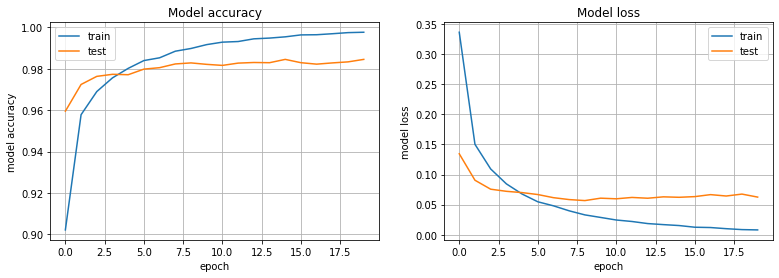

In [16]:
# evaluate model
score = model_CNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print()

# look into training history

# summarize history for accuracy
plt.figure(figsize=(20, 4))
plt.subplot(131)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.grid(True)

# summarize history for loss
plt.subplot(132)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.grid(True)
plt.show()

Al termine della fase di training, ho potuto applicare la mia rete neurale a un campione di dati sempre estratto da MNIST.

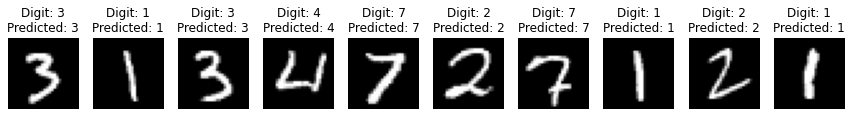

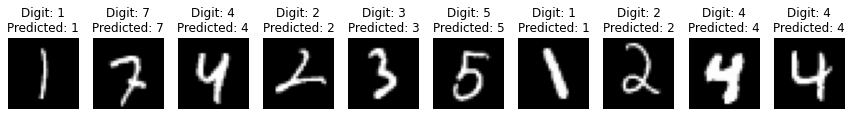

In [17]:
predictions = model_CNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i+30, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted: {}".format(np.argmax(Y_test[i+30]), np.argmax(predictions[i+30])))    
    plt.axis('off') 

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i+40, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted: {}".format(np.argmax(Y_test[i+40]), np.argmax(predictions[i+40])))    
    plt.axis('off') 

plt.show()

Dai risultati soprariportati, osserviamo come la capacità di classificare dati in input, acquisita dalla rete neurale, sia sufficientemente alta da garantire, almeno per questo particolare campione test, un rate di successi di $20/20$.

### <span style="color:darkorange"> Esercizio 12.3</span>

All'interno del terzo esercizio, ho dovuto verificare l'efficienza della CNN precedentemente costruita ed allenata a riconoscere cifre scritte a mano. Per fare ciò ho creato, attraverso l'applicazione *gimp*, $20$ immagini $28\times 28$ contenenti numeri compresi tra $0$ e $9$ scritti direttamente da me. Nello specchietto Python sottostante, ho riportato i risultati ottenuti applicando la rete neurale convoluzionale a questo campione di dati.

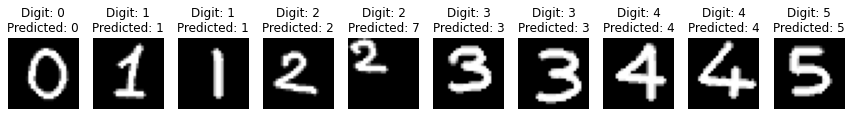

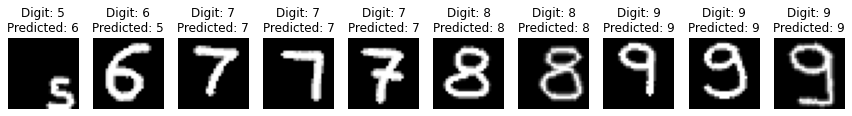

In [18]:
from PIL import Image
import os

N = 20
digit = np.zeros(N)

digit_filename = "Numeri/0.png"
digit_in = Image.open(digit_filename).convert('L')
digit[0] = 0
ydim, xdim = digit_in.size
pix=digit_in.load();
data = np.zeros((N, xdim, ydim))
for j in range(ydim):
    for i in range(xdim):
        data[0,i,j]=pix[j,i]
digit_filename = "Numeri/1a.png"
digit_in = Image.open(digit_filename).convert('L')
digit[1] = 1
pix=digit_in.load();
for j in range(ydim):
    for i in range(xdim):
        data[1,i,j]=pix[j,i]
digit_filename = "Numeri/1b.png"
digit_in = Image.open(digit_filename).convert('L')
digit[2] = 1
pix=digit_in.load();
for j in range(ydim):
    for i in range(xdim):
        data[2,i,j]=pix[j,i]
digit_filename = "Numeri/2a.png"
digit_in = Image.open(digit_filename).convert('L')
digit[3] = 2
pix=digit_in.load();
for j in range(ydim):
    for i in range(xdim):
        data[3,i,j]=pix[j,i]
digit_filename = "Numeri/2b.png"
digit_in = Image.open(digit_filename).convert('L')
digit[4] = 2
pix=digit_in.load();
for j in range(ydim):
    for i in range(xdim):
        data[4,i,j]=pix[j,i]
digit_filename = "Numeri/3a.png"
digit_in = Image.open(digit_filename).convert('L')
digit[5] = 3
pix=digit_in.load();
for j in range(ydim):
    for i in range(xdim):
        data[5,i,j]=pix[j,i]
digit_filename = "Numeri/3b.png"
digit_in = Image.open(digit_filename).convert('L')
digit[6] = 3
pix=digit_in.load();
for j in range(ydim):
    for i in range(xdim):
        data[6,i,j]=pix[j,i]
digit_filename = "Numeri/4a.png"
digit_in = Image.open(digit_filename).convert('L')
digit[7] = 4
pix=digit_in.load();
for j in range(ydim):
    for i in range(xdim):
        data[7,i,j]=pix[j,i]
digit_filename = "Numeri/4b.png"
digit_in = Image.open(digit_filename).convert('L')
digit[8] = 4
pix=digit_in.load();
for j in range(ydim):
    for i in range(xdim):
        data[8,i,j]=pix[j,i]
digit_filename = "Numeri/5a.png"
digit_in = Image.open(digit_filename).convert('L')
digit[9] = 5
pix=digit_in.load();
for j in range(ydim):
    for i in range(xdim):
        data[9,i,j]=pix[j,i]
digit_filename = "Numeri/5b.png"
digit_in = Image.open(digit_filename).convert('L')
digit[10] = 5
pix=digit_in.load();
for j in range(ydim):
    for i in range(xdim):
        data[10,i,j]=pix[j,i]
digit_filename = "Numeri/6.png"
digit_in = Image.open(digit_filename).convert('L')
digit[11] = 6
pix=digit_in.load();
for j in range(ydim):
    for i in range(xdim):
        data[11,i,j]=pix[j,i]
digit_filename = "Numeri/7a.png"
digit_in = Image.open(digit_filename).convert('L')
digit[12] = 7
pix=digit_in.load();
for j in range(ydim):
    for i in range(xdim):
        data[12,i,j]=pix[j,i]
digit_filename = "Numeri/7b.png"
digit_in = Image.open(digit_filename).convert('L')
digit[13] = 7
pix=digit_in.load();
for j in range(ydim):
    for i in range(xdim):
        data[13,i,j]=pix[j,i]
digit_filename = "Numeri/7c.png"
digit_in = Image.open(digit_filename).convert('L')
digit[14] = 7
pix=digit_in.load();
for j in range(ydim):
    for i in range(xdim):
        data[14,i,j]=pix[j,i]
digit_filename = "Numeri/8a.png"
digit_in = Image.open(digit_filename).convert('L')
digit[15] = 8
pix=digit_in.load();
for j in range(ydim):
    for i in range(xdim):
        data[15,i,j]=pix[j,i]
digit_filename = "Numeri/8b.png"
digit_in = Image.open(digit_filename).convert('L')
digit[16] = 8
pix=digit_in.load();
for j in range(ydim):
    for i in range(xdim):
        data[16,i,j]=pix[j,i]
digit_filename = "Numeri/9a.png"
digit_in = Image.open(digit_filename).convert('L')
digit[17] = 9
pix=digit_in.load();
for j in range(ydim):
    for i in range(xdim):
        data[17,i,j]=pix[j,i]
digit_filename = "Numeri/9b.png"
digit_in = Image.open(digit_filename).convert('L')
digit[18] = 9
pix=digit_in.load();
for j in range(ydim):
    for i in range(xdim):
        data[18,i,j]=pix[j,i]
digit_filename = "Numeri/9c.png"
digit_in = Image.open(digit_filename).convert('L')
digit[19] = 9
pix=digit_in.load();
for j in range(ydim):
    for i in range(xdim):
        data[19,i,j]=pix[j,i]

data /= 255
data = data.reshape(N,1,xdim,ydim,1)

pred = np.zeros((N,1,10))
for i in range(N):
    pred[i,:,:] = model_CNN.predict(data[i,:,:,:,:])

data = data.reshape(N,xdim,ydim)

plt.figure(figsize=(15, 15))
for i in range(10): 
    ax = plt.subplot(2, 10, i+1) 
    plt.imshow(data[i,:,:], cmap='gray')    
    plt.title("Digit: {}\nPredicted: {}".format(int(digit[i]),np.argmax(pred[i,:,:])))
    plt.axis('off')

plt.figure(figsize=(15, 15))
for i in range(10): 
    ax = plt.subplot(2, 10, i+1) 
    plt.imshow(data[i+10,:,:], cmap='gray')    
    plt.title("Digit: {}\nPredicted: {}".format(int(digit[i+10]),np.argmax(pred[i+10,:,:])))
    plt.axis('off')

plt.show()

Come si può notare, il rate di successi ottenuti è pari a $17/20$. Il campione utilizzato per il test conteneva al suo interno dati relativamente complessi. Infatti alcuni numeri, come ad esempio il $4$, il $7$ e il $9$, sono stati rappresentati con differenti stili allo scopo di analizzare la versatilità della rete neurale. Vediamo come la risposta del codice a questo particolare problema sia molto efficiente, nonostante rimangano delle ambiguità nella classificazione del $6$. Contemporaneamente ho anche voluto verificare la capacità della mia CNN di sfruttare l'invarianza traslazionale per dedurre proprietà locali dell'immagine. Nello specifico, ho scritto due numeri, il $5$ e il $2$, delocalizzati rispetto al centro del box $28 \times 28$. Questa volta, il compito assegnato è chiaramente molto arduo ed infatti il codice non è in grado di operare un processo di classificazione efficiente.